<a href="https://colab.research.google.com/github/mjmkh/nonlinear-model/blob/main/Copy_of_attempt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
df = pd.read_csv('/content/tri contacnated.csv')
df.head()

,Time,T at 1,T at 2,T at 3,q
0,0.00,293.15,293.15,293.15,1.420000e-12
1,0.01,293.15,293.15,293.15,1.710000e-12
2,0.02,293.15,293.15,293.15,5.680000e-13
3,0.03,293.15,293.15,293.15,-1.420000e-13
4,0.04,293.15,293.15,293.15,-8.530000e-13


In [ ]:
X = df['T at 1'].values
Y = df['q'].values
X, Y, X.shape, Y.shape 

(array([293.15     , 293.15     , 293.15     , ..., 299.1006592,
        299.1007221, 299.1007863]),
 array([ 1.42000000e-12,  1.71000000e-12,  5.68000000e-13, ...,
        -1.48487621e+01, -1.48489933e+01, -1.48489933e+01]),
 (1501,),
 (1501,))

Generate Noise

-0.9074581243819182 0.7853458020232927


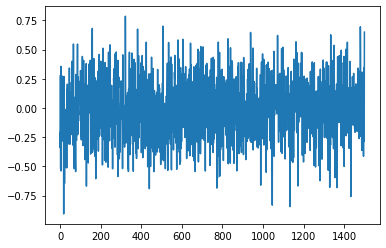

In [ ]:
# 0 is the mean of the normal distribution you are choosing from
# 1 is the standard deviation of the normal distribution
# length of temperature is the number of elements in array noise
noise = np.random.normal(0, 0.25, len(X))
print(min(noise), max(noise))
plt.plot(noise)

Add noise to the temperatures

In [ ]:
Xn = np.zeros(len(X))

for k in range(len(X)):
  Xn[k] = noise[k] + X[k]

print(len(Xn))

1501


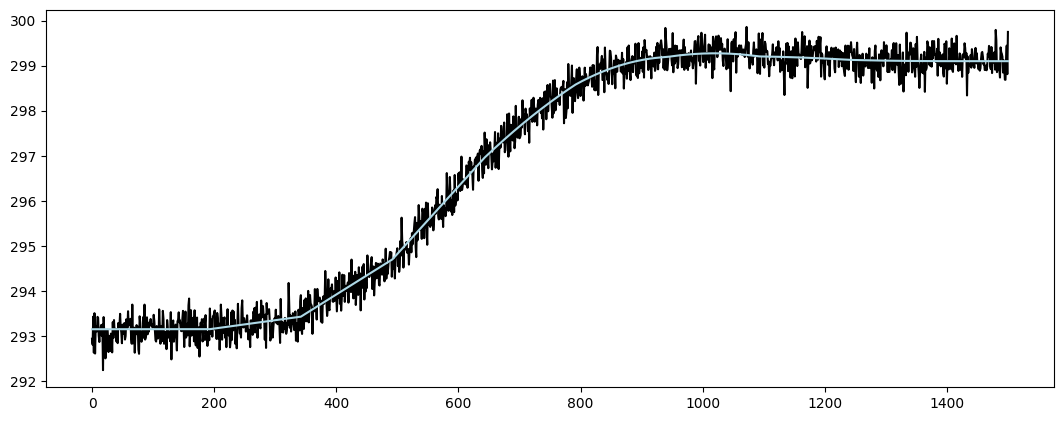

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(13, 5), dpi=100)
plt.plot(Xn, 'black')
plt.plot(X, 'lightblue')

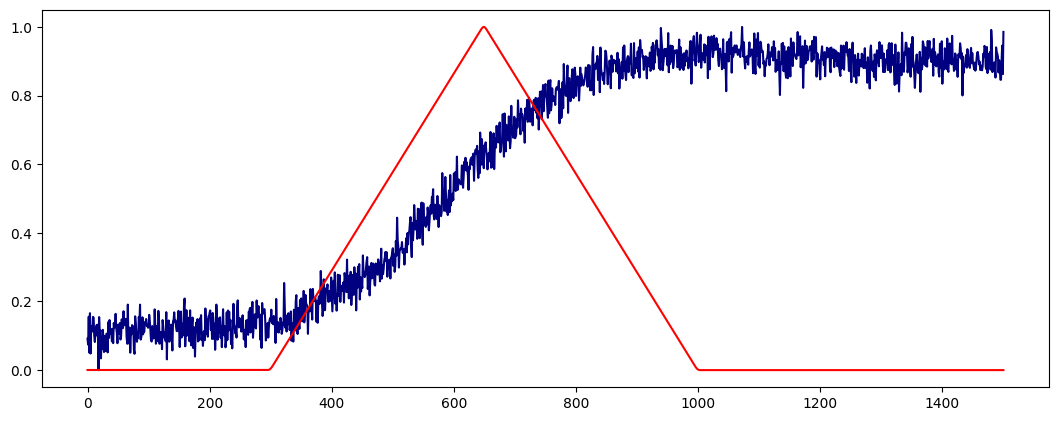

In [ ]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
Xm = min_max_scaler.fit_transform(Xn.reshape(-1,1))


Ym = min_max_scaler.fit_transform(Y.reshape(-1,1))
figure(figsize=(13, 5), dpi=100)
plt.plot(Xm, color='navy')
plt.plot(Ym, color='r')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xm, Ym, test_size=0.4, random_state=None, shuffle=False)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy
%matplotlib inline

Epoch 1/500
129/129 [==============================] - 1s 2ms/step - loss: 0.1025 - accuracy: 0.0000e+00
Epoch 2/500
129/129 [==============================] - 0s 2ms/step - loss: 0.0589 - accuracy: 0.0011
Epoch 3/500
129/129 [==============================] - 0s 2ms/step - loss: 0.0547 - accuracy: 0.0011
Epoch 4/500
129/129 [==============================] - 0s 2ms/step - loss: 0.0538 - accuracy: 0.0011
Epoch 5/500
129/129 [==============================] - 0s 2ms/step - loss: 0.0537 - accuracy: 0.0011
Epoch 6/500
129/129 [==============================] - 0s 2ms/step - loss: 0.0537 - accuracy: 0.0011
Epoch 7/500
129/129 [==============================] - 0s 3ms/step - loss: 0.0534 - accuracy: 0.0011
Epoch 8/500
129/129 [==============================] - 0s 2ms/step - loss: 0.0537 - accuracy: 0.0011
Epoch 9/500
129/129 [==============================] - 0s 3ms/step - loss: 0.0538 - accuracy: 0.0011
Epoch 10/500
129/129 [==============================] - 0s 3ms/step - loss: 0.0535 - ac

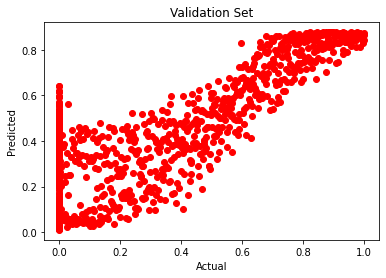

In [ ]:
# create model
model = Sequential()
model.add(Dense(200, activation="tanh", input_dim=1, kernel_initializer="uniform"))
model.add(Dense(1, activation="sigmoid", kernel_initializer="uniform"))

# Compile model
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

# Fit the model
model.fit(X_train, y_train, epochs=500, batch_size=7,  verbose=1)

# Calculate predictions
PredTestSet = model.predict(X_train)
PredValSet = model.predict(X_test)

# Save predictions
numpy.savetxt("trainresults.csv", PredTestSet, delimiter=",")
numpy.savetxt("valresults.csv", PredValSet, delimiter=",")

#Plot actual vs predition for training set
TestResults = numpy.genfromtxt("trainresults.csv", delimiter=",")
plt.plot(y_train,TestResults,'ro')
plt.title('Training Set')
plt.xlabel('Actual')
plt.ylabel('Predicted')

#Compute R-Square value for training set
TestR2Value = r2_score(y_train,TestResults)
print("Training Set R-Square=", TestR2Value)

#Plot actual vs predition for validation set
ValResults = numpy.genfromtxt("valresults.csv", delimiter=",")
plt.plot(y_test,ValResults,'ro')
plt.title('Validation Set')
plt.xlabel('Actual')
plt.ylabel('Predicted')

#Compute R-Square value for validation set
ValR2Value = r2_score(y_test,ValResults)
print("Validation Set R-Square=",ValR2Value)

In [ ]:
import tensorflow as tf
print(tf.__version__)

1.14.0


In [ ]:
!pip uninstall tensorflow -y
!pip install  tensorflow==1.14

Found existing installation: tensorflow 1.14.0
Uninstalling tensorflow-1.14.0:
  Successfully uninstalled tensorflow-1.14.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached tensorflow-1.14.0-cp37-cp37m-manylinux1_x86_64.whl (109.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
kapre 0.3.7 requires tensorflow>=2.0.0, but you have tensorflow 1.14.0 which is incompatible.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch is: 0050 loss= 0.131217197 W= -0.003123921 b= -0.002712287
Epoch is: 0100 loss= 0.131217197 W= -0.003123921 b= -0.002712287
Epoch is: 0150 loss= 0.131217197 W= -0.003123921 b= -0.002712287
Epoch is: 0200 loss= 0.131217197 W= -0.003123921 b= -0.002712287
Epoch is: 0250 loss= 0.131217197 W= -0.003123921 b= -0.002712287
Epoch is: 0300 loss= 0.131217197 W= -0.003123921 b= -0.002712287
Epoch is: 0350 loss= 0.131217197 W= -0.003123921 b= -0.002712287
Epoch is: 0400 loss= 0.131217197 W= -0.003123921 b= -0.002712287
Epoch is: 0450 loss= 0.131217197 W= -0.003123921 b= -0.002712287
Epoch is: 0500 loss= 0.131217197 W= -0.003123921 b= -0.002712287
Epoch is: 0550 loss= 0.131217197 W= -0.003123921 b= -0.002712287
Epoch is: 0600 loss= 0.131217197 W= -0.003123921 b= -0.002712287
Epoch is: 0650 loss= 0.131217197 W= -0.003123921 b= -0.002712287
Epoch is: 0700 loss= 0.131217197 W= -0.003123921 b= -0.002712

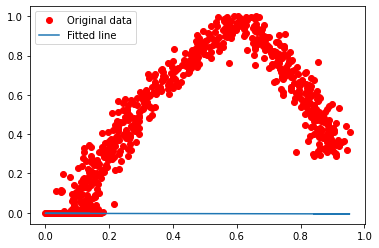

Testing... (Mean square loss Comparison)
Testing cost= 0.0024001636
Absolute mean square loss difference: 0.12881704


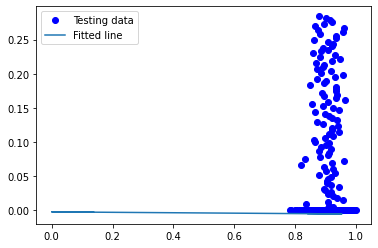

In [ ]:

rndm = np.random

# config parameters
learningRate = 0.001
trainingEpochs = 1000
displayStep = 50

# create the training data
trainX = X_train
trainY = y_train
nSamples = trainX.shape[0]

# tf inputs
X = tf.placeholder("float")
Y = tf.placeholder("float")

# initialize weights and bias
W = tf.Variable(rndm.randn(), name="weight") * 0.01
b = tf.Variable(rndm.randn(), name="bias") * 0.01

# linear model
linearModel = tf.add(tf.multiply(X, W), b)

# mean squared error
loss = tf.reduce_sum(tf.pow(linearModel-Y, 2))/(2*nSamples)

# Gradient descent
opt = tf.train.GradientDescentOptimizer(learningRate).minimize(loss)

# initializing variables
init = tf.global_variables_initializer()

# run
with tf.Session() as sess:
    sess.run(init)

    # fitting the training data
    for epoch in range(trainingEpochs):
        for (x, y) in zip(trainX, trainY):
            sess.run(opt, feed_dict={X: x, Y: y})

        # print logs
        if (epoch+1) % displayStep == 0:
            c = sess.run(loss, feed_dict={X: trainX, Y:trainY})
            print("Epoch is:", '%04d' % (epoch+1), "loss=", "{:.9f}".format(c), "W=", sess.run(W), "b=", sess.run(b))

    print("optimization done...")
    trainingLoss = sess.run(loss, feed_dict={X: trainX, Y: trainY})
    print("Training loss=", trainingLoss, "W=", sess.run(W), "b=", sess.run(b), '\n')

    # display the plot
    plt.plot(trainX, trainY, 'ro', label='Original data')
    plt.plot(trainX, sess.run(W) * trainX + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

    # Testing example, as requested (Issue #2)
    testX = X_test
    testY = y_test

    print("Testing... (Mean square loss Comparison)")
    testing_cost = sess.run(
        tf.reduce_sum(tf.pow(linearModel - Y, 2)) / (2 * testX.shape[0]),
        feed_dict={X: testX, Y: testY})
    print("Testing cost=", testing_cost)
    print("Absolute mean square loss difference:", abs(trainingLoss - testing_cost))

    plt.plot(testX, testY, 'bo', label='Testing data')
    plt.plot(trainX, sess.run(W) * trainX + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()